# Titanic Data Analysis

In [85]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
#load data
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [87]:
titanic.shape

(891, 15)

In [88]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
#number of people who have survived
titanic['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

C:\Users\joy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='survived', ylabel='count'>

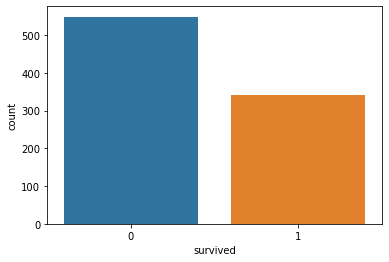

In [90]:
#visualize the survivers
sns.countplot(titanic['survived'])

C:\Users\joy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\joy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\joy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\joy\anaconda3\lib\site-packa

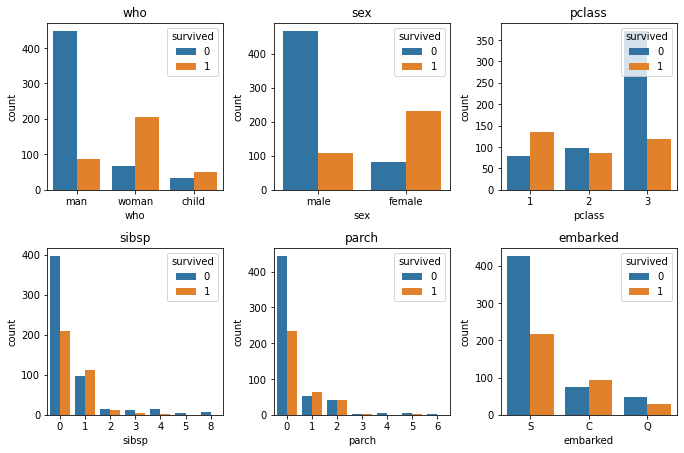

In [91]:
#visualize the data

cols =['who', 'sex', 'pclass', 'sibsp', 'parch', 'embarked']

n_rows = 2
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 3.2, n_rows * 3.2))

for r in range(0, n_rows):
    for c in range(0, n_cols):
        
        i = r * n_cols + c
        ax = axs[r][c]
        sns.countplot(titanic[cols[i]], hue=titanic['survived'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='survived', loc = 'upper right')
        
plt.tight_layout()
        

In [92]:
#survival rate by sex
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [93]:
#survival rate by sex and class
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


<AxesSubplot:xlabel='sex'>

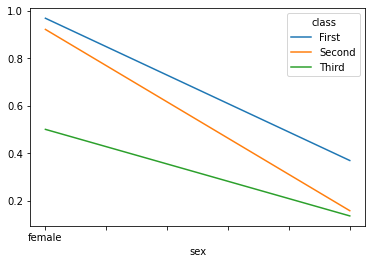

In [94]:
#survival rate by sex and class visually
titanic.pivot_table('survived', index='sex', columns='class').plot()

<AxesSubplot:xlabel='class', ylabel='survived'>

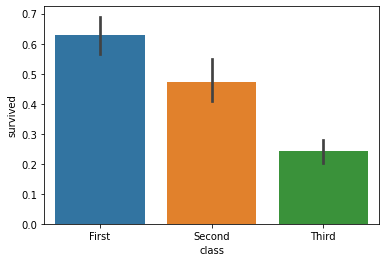

In [95]:
#plot the survival rate of each class
sns.barplot(x='class', y='survived', data=titanic)

In [96]:
#survival rate based on sex and age and class
age = pd.cut(titanic['age'], [0, 18, 80])
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

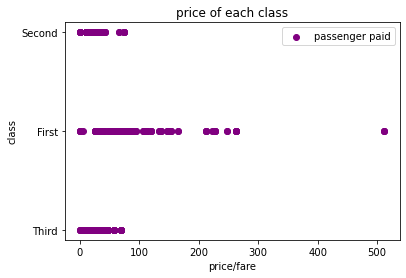

In [97]:
#plot prices paid for each class

plt.scatter(titanic['fare'], titanic['class'], color='purple', label='passenger paid')
plt.ylabel('class')
plt.xlabel('price/fare')
plt.title('price of each class')
plt.legend()
plt.show()

In [98]:
#count empty values in each column
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [99]:
for val in titanic:
    print(titanic[val].value_counts())
    print()

0    549
1    342
Name: survived, dtype: int64

3    491
1    216
2    184
Name: pclass, dtype: int64

male      577
female    314
Name: sex, dtype: int64

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: sibsp, dtype: int64

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: parch, dtype: int64

8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
50.4958     1
13.8583     1
8.4583      1
7.7250      1
7.5208      1
Name: fare, Length: 248, dtype: int64

S    644
C    168
Q     77
Name: embarked, dtype: int64

Third     491
First     216
Second    184
Name: class, dtype: int64

man      537
woman    271
child     83
Name: who, dtype: int64

True     537
False    354
Name: adult_male, dtype: int64

C    59
B    47
D    33
E    32
A    15
F    13
G     

In [100]:
#drop the columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'alone', 'adult_male'], axis=1)

#remove the rows with missing values
titanic = titanic.dropna(subset = ['embarked', 'age'])

In [101]:
titanic.shape

(712, 8)

In [102]:
#getting the data types
titanic.dtypes

survived      int64
pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
dtype: object

In [103]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#encode sex column
print(titanic['sex'].unique())
titanic.iloc[:, 2] = labelencoder.fit_transform(titanic.iloc[:, 2].values)
print(titanic['sex'].unique())
print()

#encode embark column
print(titanic['embarked'].unique())
titanic.iloc[:, 7] = labelencoder.fit_transform(titanic.iloc[:, 7].values)
print(titanic['embarked'].unique())

['male' 'female']
[1 0]

['S' 'C' 'Q']
[2 0 1]


In [104]:
#feature and target
X = titanic.iloc[:, 1:8].values
Y = titanic.iloc[:, 0].values

#trian and test split

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [105]:
#Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [106]:
#Models

def models(X_train, Y_train):
    
    #logistic regression
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression(random_state=0)
    log.fit(X_train, Y_train)
    
    #k_neighbor
    from sklearn.neighbors import KNeighborsClassifier
    knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p =2)
    knn.fit(X_train, Y_train)
    
    #SVC
    from sklearn.svm import SVC
    svc_lin = SVC(kernel='linear', random_state=0)
    svc_lin.fit(X_train, Y_train)
    
    #SVC(RBF)
    from sklearn.svm import SVC
    svc_rbf = SVC(kernel='rbf', random_state=0)
    svc_rbf.fit(X_train, Y_train)
    
    #GuassianNB
    from sklearn.naive_bayes import GaussianNB
    gauss = GaussianNB()
    gauss.fit(X_train, Y_train)
    
    #Decision tree
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier(criterion='entropy', random_state=0)
    tree.fit(X_train, Y_train)
    
    #Random Forest
    from sklearn.ensemble import RandomForestClassifier
    forest = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state =0)
    forest.fit(X_train, Y_train)
    
    #accuracy of each model
    
    print('[0]Logistic regression accuracy on training data: ', log.score(X_train, Y_train))
    print('[1]KNN accuracy on training data: ', knn.score(X_train, Y_train))
    print('[2]SVC linear kernel accuracy on training data: ', svc_lin.score(X_train, Y_train))
    print('[3]SVC RBF kernel accuracy on training data: ', svc_rbf.score(X_train, Y_train))
    print('[4]Naive Bayes accuracy on training data: ', gauss.score(X_train, Y_train))
    print('[5]Decision Tree accuracy on training data: ', tree.score(X_train, Y_train))
    print('[6]Rancom Forest accuracy on training data: ', forest.score(X_train, Y_train))
    
    return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [107]:
#trian the models
model = models(X_train, Y_train)

[0]Logistic regression accuracy on training data:  0.7978910369068541
[1]KNN accuracy on training data:  0.8664323374340949
[2]SVC linear kernel accuracy on training data:  0.7768014059753954
[3]SVC RBF kernel accuracy on training data:  0.8506151142355008
[4]Naive Bayes accuracy on training data:  0.8031634446397188
[5]Decision Tree accuracy on training data:  0.9929701230228472
[6]Rancom Forest accuracy on training data:  0.9753954305799648


In [108]:
#confusion matrix
from sklearn.metrics import confusion_matrix

for i in range(len(model)):
    cm = confusion_matrix(Y_test, model[i].predict(X_test))
    #TN, FP, FN, TP
    TN, FP, FN, TP = confusion_matrix(Y_test, model[i].predict(X_test)).ravel()
    test_score = (TP + TN) / (TP + TN + FN + FP)
    
    print(cm)
    print("Model[{}] Testing accuracy: '{}'" .format(i, test_score))
    print()

[[75  7]
 [19 42]]
Model[0] Testing accuracy: '0.8181818181818182'

[[67 15]
 [20 41]]
Model[1] Testing accuracy: '0.7552447552447552'

[[70 12]
 [18 43]]
Model[2] Testing accuracy: '0.7902097902097902'

[[75  7]
 [22 39]]
Model[3] Testing accuracy: '0.7972027972027972'

[[69 13]
 [27 34]]
Model[4] Testing accuracy: '0.7202797202797203'

[[54 28]
 [12 49]]
Model[5] Testing accuracy: '0.7202797202797203'

[[73  9]
 [14 47]]
Model[6] Testing accuracy: '0.8391608391608392'



In [109]:
#feature importance

forest = model[6]
importances = pd.DataFrame({'feature': titanic.iloc[:, 1:8].columns,
                           'importance':np.round(forest.feature_importances_, 3)})
importances = importances.sort_values('importance', ascending=False).set_index('feature')
importances

,importance
feature,
age,0.300
fare,0.296
sex,0.183
pclass,0.098
sibsp,0.050
parch,0.044
embarked,0.030


<AxesSubplot:xlabel='feature'>

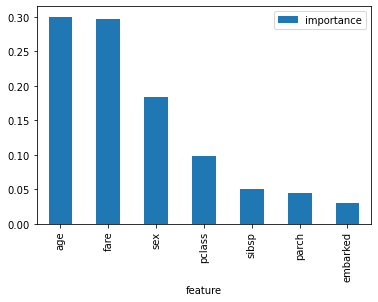

In [110]:
#visualize importances
importances.plot.bar()

In [111]:
#predictions

pred = model[6].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 0 0 1]

[0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 1
 1 1 1 1 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 0 0
 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1]


In [112]:
#predict my survival
my_survival = [[3,1,21,1,1,200,1]]

#Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
my_survival_scaled = sc.fit_transform(my_survival)

#prediction of my survival
pred = model[6].predict(my_survival_scaled)
print(pred)

if pred == 0:
    print('You did not make it')
else:
    print('You survived')

[0]
You did not make it
